In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import to_rgb
import numpy as np
import pandas as pd
import cv2
import imutils
%matplotlib inline

In [2]:
# https://www.pyimagesearch.com/2015/08/10/checking-your-opencv-version-using-python/
print('cv2: ', cv2.__version__)
print('imutils: ', imutils.__version__)
print("Are you using OpenCV 3.X? {}".format(imutils.is_cv3()))

cv2:  3.3.1
imutils:  0.4.5
Are you using OpenCV 3.X? True


### Color from string

In [3]:
# https://matplotlib.org/users/colors.html
def color(c):
    return tuple(int(x*255) for x in to_rgb(c))

print('red:', color('red'))
print('blue:', color('blue'))
print('green:', color('g'))

red: (255, 0, 0)
blue: (0, 0, 255)
green: (0, 127, 0)


### Draw countours
imutils.auto_canny

In [4]:
image = cv2.imread("drawing.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

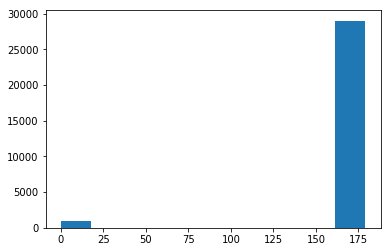

In [5]:
_ = plt.hist(gray.ravel())

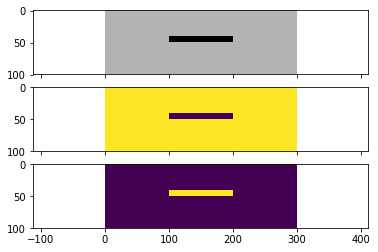

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
for ax, im in zip(axes.flat, [image, gray, thresh]):
    ax.imshow(im)

In [7]:
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

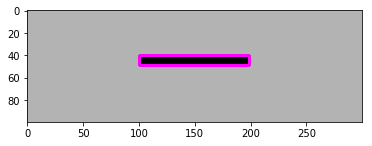

In [8]:
_ = cv2.drawContours(image, cnts, -1, color('magenta'), 2)
plt.imshow(image)

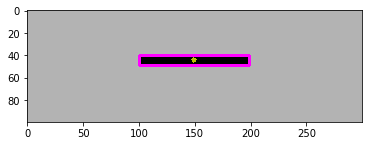

In [9]:
cnt = cnts[0]
M = cv2.moments(cnt)
cX, cY = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
cv2.circle(image, (cX, cY), 2, color('y'), -1)
plt.imshow(image)

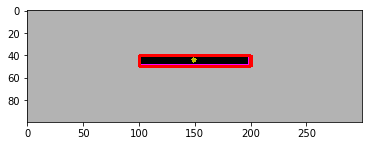

In [10]:
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(image,(x,y),(x+w, y+h), color('red'),2)
plt.imshow(image)

### Multiple Contours
cv2.findContours

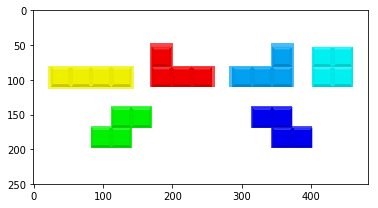

In [11]:
image = cv2.imread("tetris_blocks.png")
plt.imshow(image)

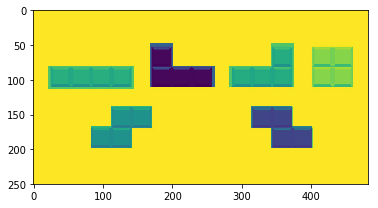

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

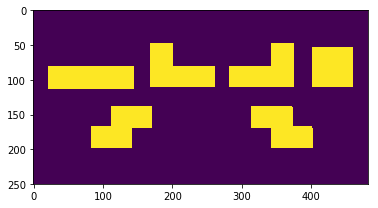

In [13]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)

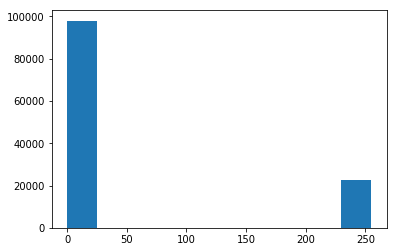

In [14]:
_ = plt.hist(thresh.ravel())

In [15]:
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

,cX,cY
0,357,167
1,126,167
2,83,96
3,430,81
4,337,86
5,205,86


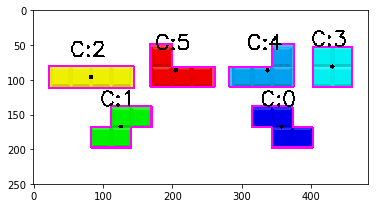

In [16]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
df = pd.DataFrame(columns=['cX','cY'])
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 1, 30, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
for i, c in enumerate(cnts):
    # compute the center of the contour
    M = cv2.moments(c)
    cX, cY = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])
    df.loc[i] = pd.Series({'cX': cX, 'cY': cY})
 
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
    cv2.circle(image, (cX, cY), radius, color('black'), circle_thickness)
    cv2.putText(image, 'C:{}'.format(i), (cX - offset, cY - offset), 
                font, fontScale, color('black'), thickness)
 
    # show the image, does not work well on notebook
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
plt.imshow(image)
df